In [526]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

In [527]:
# Replace 'data.csv' with the actual path to your dataset
df = pd.read_csv('x.csv')

# Create an empty list to store the reshaped data
reshaped_data = []

# Iterate through each row in the original dataframe
for index, row in df.iterrows():
    subdivision = row['SUBDIVISION']
    year = row['YEAR']
    
    # Iterate through the columns representing months
    for month in df.columns[2:]:
        year_month = f"{year}-{month.zfill(2)}"
        rainfall = row[month]
        
        # Append the data in the desired format to the reshaped_data list
        reshaped_data.append([subdivision, year_month, rainfall])

# Create a new dataframe using the reshaped_data list
reshaped_df = pd.DataFrame(reshaped_data, columns=['SUBDIVISION', 'YEAR-MONTH', 'RAINFALL'])

# Print the reshaped dataframe
print(reshaped_df)

                     SUBDIVISION YEAR-MONTH  RAINFALL
0      ANDAMAN & NICOBAR ISLANDS   1901-JAN      49.2
1      ANDAMAN & NICOBAR ISLANDS   1901-FEB      87.1
2      ANDAMAN & NICOBAR ISLANDS   1901-MAR      29.2
3      ANDAMAN & NICOBAR ISLANDS   1901-APR       2.3
4      ANDAMAN & NICOBAR ISLANDS   1901-MAY     528.8
...                          ...        ...       ...
49387                LAKSHADWEEP   2015-AUG     146.4
49388                LAKSHADWEEP   2015-SEP     160.4
49389                LAKSHADWEEP   2015-OCT     165.4
49390                LAKSHADWEEP   2015-NOV     231.0
49391                LAKSHADWEEP   2015-DEC     159.0

[49392 rows x 3 columns]


In [528]:
# Remove rows with NaN values and zeros in the 'RAINFALL' column
reshaped_df_cleaned = reshaped_df.dropna(subset=['RAINFALL'])
reshaped_df_cleaned = reshaped_df_cleaned[reshaped_df_cleaned['RAINFALL'] != 0]

In [529]:
# Remove rows with NaN values and zeros in the 'RAINFALL' column
reshaped_df_cleaned = reshaped_df.dropna(subset=['RAINFALL'])
reshaped_df_cleaned = reshaped_df_cleaned[reshaped_df_cleaned['RAINFALL'] != 0]

# Convert 'YEAR-MONTH' to datetime
reshaped_df_cleaned['YEAR-MONTH'] = pd.to_datetime(reshaped_df_cleaned['YEAR-MONTH'], format='%Y-%b')

# Filter the data for the chosen subdivision (e.g., 'ANDAMAN & NICOBAR ISLANDS')
subdivision_data = reshaped_df_cleaned[reshaped_df_cleaned['SUBDIVISION'] == 'PUNJAB']

# Set 'YEAR-MONTH' as the index for time series analysis
subdivision_data.set_index('YEAR-MONTH', inplace=True)

# Sort the data based on the index (time series data should be sorted chronologically)
subdivision_data.sort_index(inplace=True)


rainfall_data = subdivision_data['RAINFALL']

In [530]:
rainfall_data.tail(10)

YEAR-MONTH
2015-03-01     68.5
2015-04-01     29.8
2015-05-01     16.7
2015-06-01     48.3
2015-07-01    130.2
2015-08-01     88.6
2015-09-01     69.2
2015-10-01      9.0
2015-11-01      0.8
2015-12-01      0.7
Name: RAINFALL, dtype: float64

<Axes: xlabel='YEAR-MONTH'>

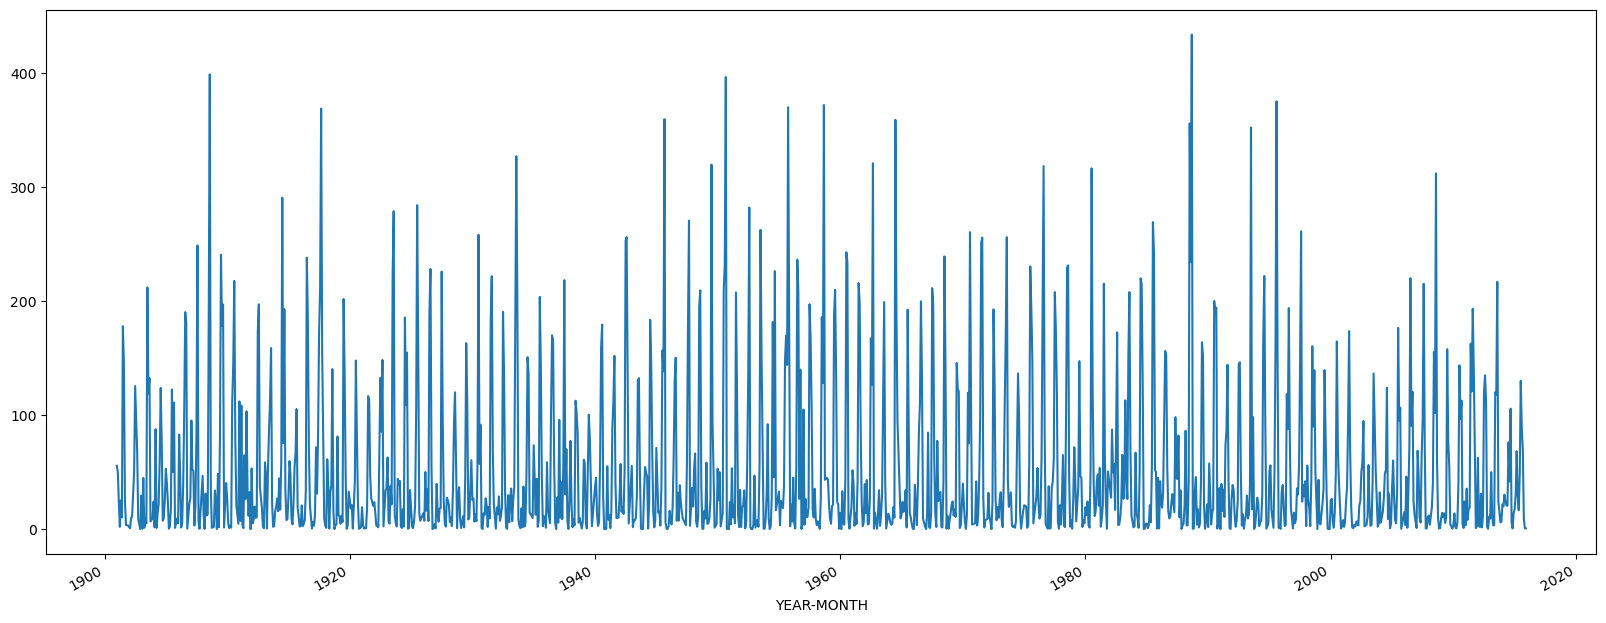

In [531]:
plt.figure(figsize=(20, 8)) 
rainfall_data.plot()

In [532]:
rainfall_data = pd.DataFrame(rainfall_data)
rainfall_data.head(5)
# print("Column names:", column_names)

,RAINFALL
YEAR-MONTH,
1901-01-01,55.7
1901-02-01,50.1
1901-03-01,25.2
1901-04-01,2.1
1901-05-01,25.2


In [533]:
# Adjust the display options to show all columns
pd.set_option('display.max_columns', None)

# Assuming your data is in a DataFrame named 'rainfall_data'
# with columns 'YEAR-MONTH' and 'RAINFALL'
rainfall_data = rainfall_data.reset_index()

print(rainfall_data.columns)
rainfall_data.head()
rainfall_data.to_csv('rrr.csv')

Index(['YEAR-MONTH', 'RAINFALL'], dtype='object')


In [534]:
df = rainfall_data.copy()

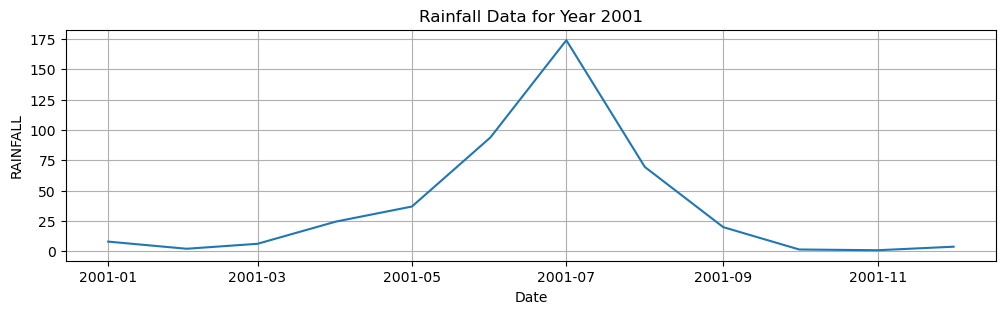

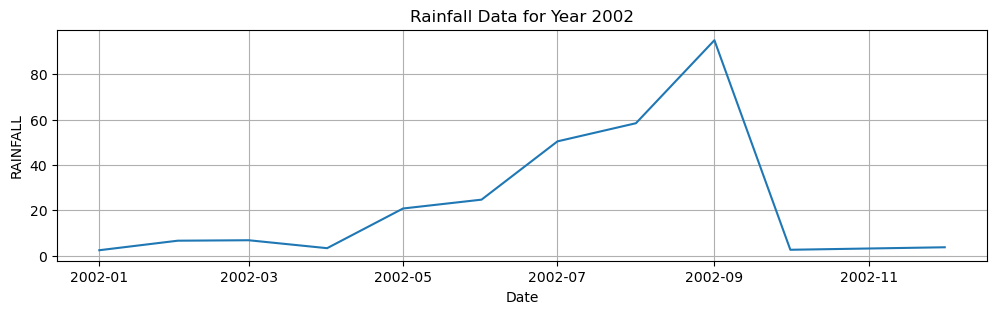

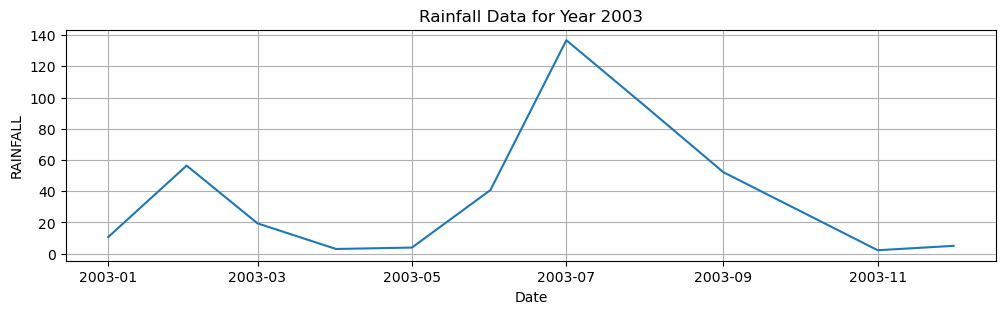

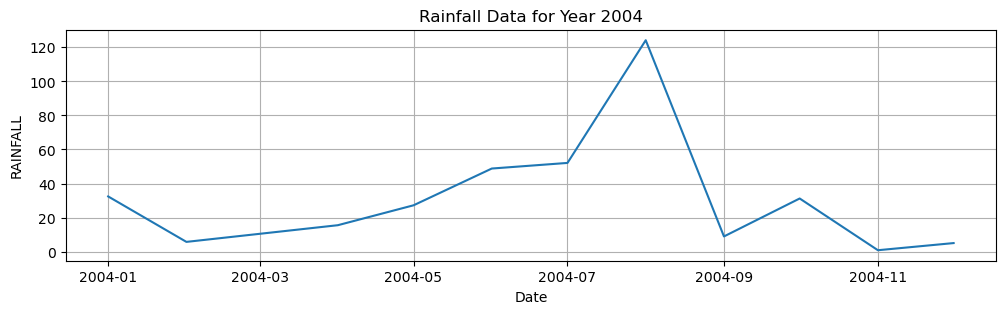

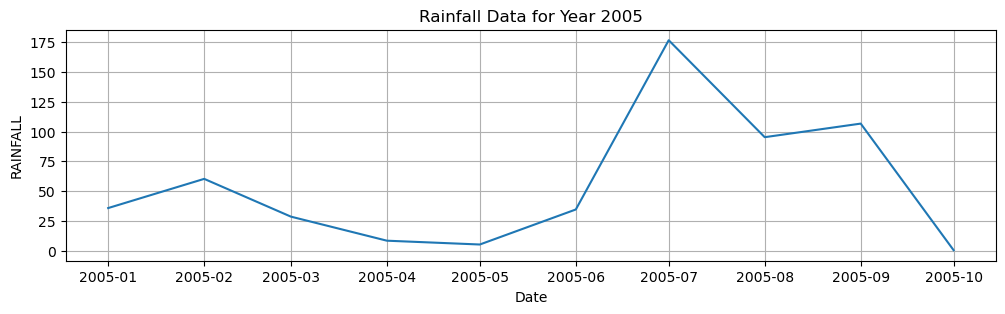

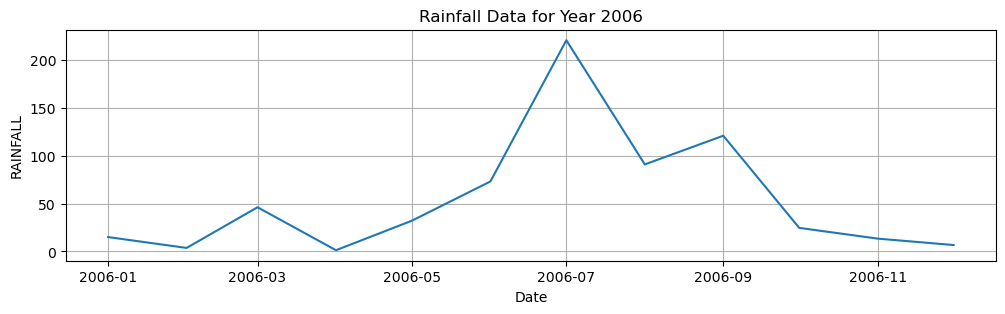

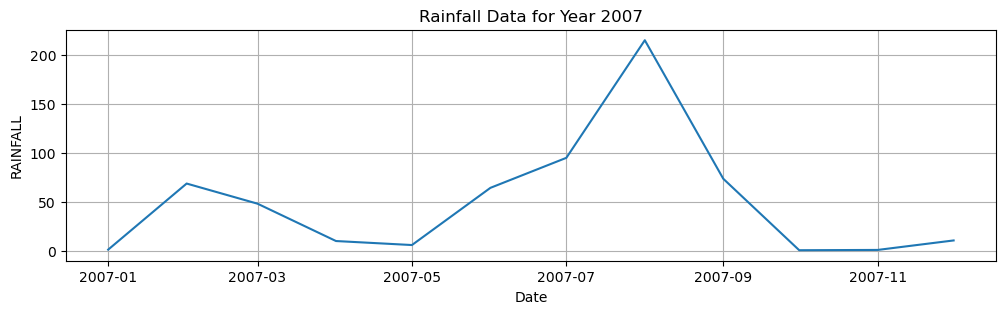

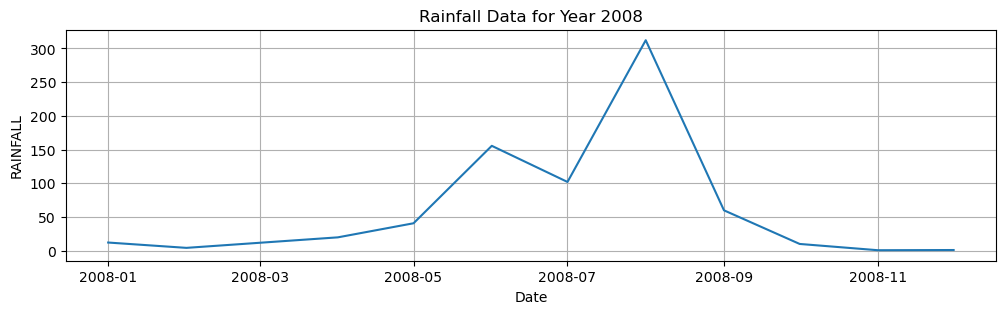

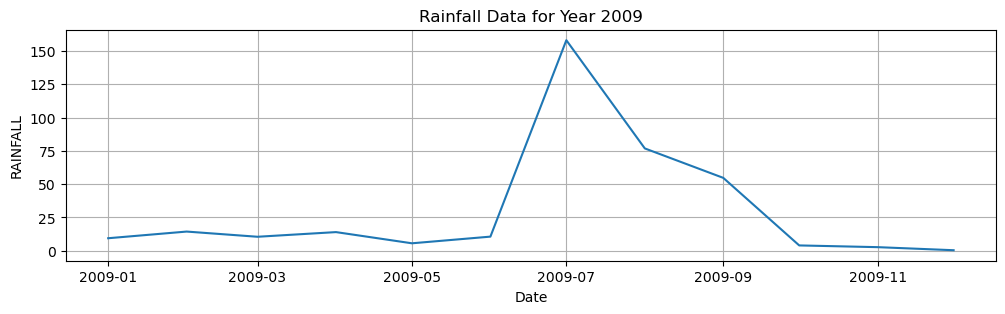

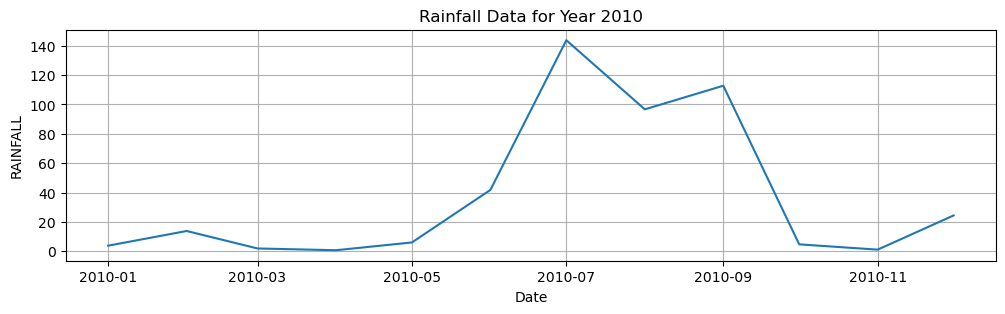

In [535]:
# Convert 'date' column to datetime format

df['YEAR-MONTH'] = pd.to_datetime(df['YEAR-MONTH'])

# Extract years from the 'date' column
df['year'] = df['YEAR-MONTH'].dt.year

# Define the start and end years for the 10-year period
start_year = 2001
end_year = 2010

# Loop through each year and create separate plots
for year in range(start_year, end_year + 1):
    plt.figure(figsize=(12, 3))
    year_data = df[df['year'] == year]
    
    plt.plot(year_data['YEAR-MONTH'], year_data['RAINFALL'])
    plt.xlabel('Date')
    plt.ylabel('RAINFALL')
    plt.title(f'Rainfall Data for Year {year}')
    plt.grid(True)
    plt.show()


In [536]:
rainfall_data.head(5)

,YEAR-MONTH,RAINFALL
0,1901-01-01,55.7
1,1901-02-01,50.1
2,1901-03-01,25.2
3,1901-04-01,2.1
4,1901-05-01,25.2


In [537]:
rainfall_data = rainfall_data.set_index('YEAR-MONTH') 

In [538]:
rainfall_data.index

DatetimeIndex(['1901-01-01', '1901-02-01', '1901-03-01', '1901-04-01',
               '1901-05-01', '1901-06-01', '1901-07-01', '1901-08-01',
               '1901-09-01', '1901-10-01',
               ...
               '2015-03-01', '2015-04-01', '2015-05-01', '2015-06-01',
               '2015-07-01', '2015-08-01', '2015-09-01', '2015-10-01',
               '2015-11-01', '2015-12-01'],
              dtype='datetime64[ns]', name='YEAR-MONTH', length=1313, freq=None)

In [539]:
## rule A year end frequency
rainfall_data_min_y = rainfall_data.resample(rule='A').min()
rainfall_data_min_y.head()

,RAINFALL
YEAR-MONTH,
1901-12-31,2.1
1902-12-31,0.1
1903-12-31,0.5
1904-12-31,1.2
1905-12-31,0.5


<Axes: xlabel='YEAR-MONTH'>

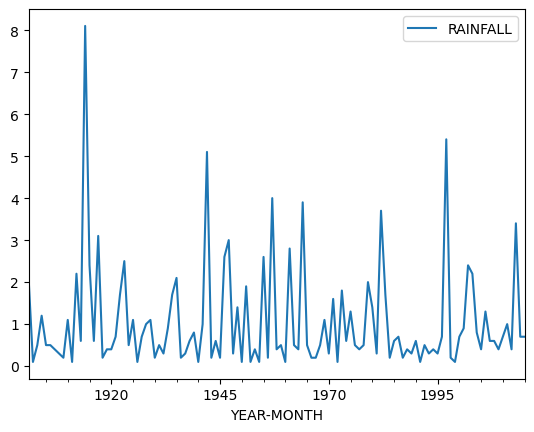

In [540]:
rainfall_data_min_y.plot()

In [541]:
## quartely start frequency
rainfall_data_min_q = rainfall_data.resample(rule='QS').min()
rainfall_data_min_q.head(5)

,RAINFALL
YEAR-MONTH,
1901-01-01,25.2
1901-04-01,2.1
1901-07-01,24.4
1901-10-01,3.3
1902-01-01,0.8


<Axes: xlabel='YEAR-MONTH'>

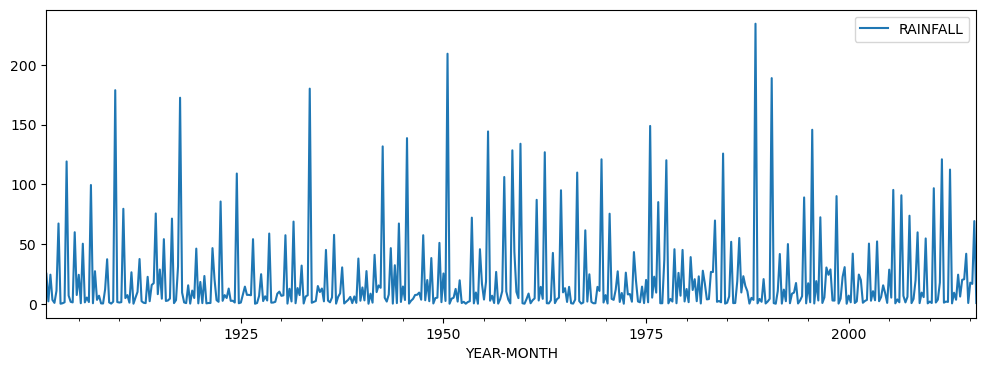

In [542]:
rainfall_data_min_q.plot(figsize=(12,4))

In [543]:
rainfall_data_max_y = rainfall_data.resample(rule='A').max()
rainfall_data_max_y.head()

,RAINFALL
YEAR-MONTH,
1901-12-31,178.2
1902-12-31,125.6
1903-12-31,212.2
1904-12-31,124.0
1905-12-31,122.6


<Axes: xlabel='YEAR-MONTH'>

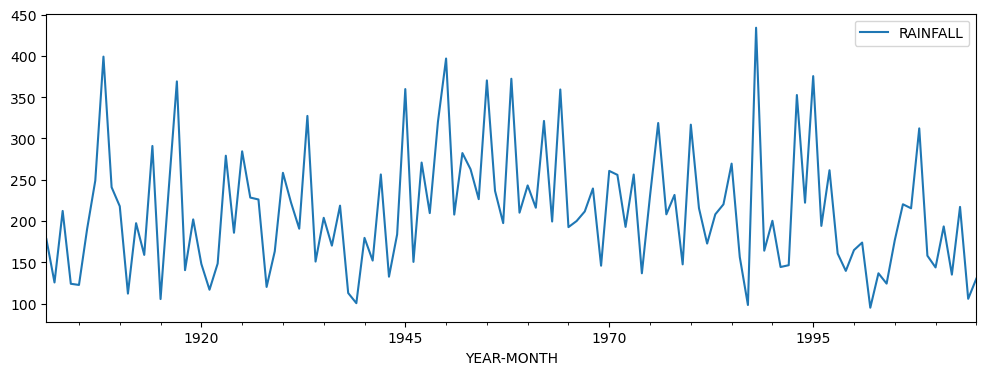

In [544]:
rainfall_data_max_y.plot(figsize=(12,4))

In [545]:
rainfall_data_max_q = rainfall_data.resample(rule='QS').max()
rainfall_data_max_q.head(5)

,RAINFALL
YEAR-MONTH,
1901-01-01,55.7
1901-04-01,25.2
1901-07-01,178.2
1901-10-01,3.7
1902-01-01,9.9


<Axes: xlabel='YEAR-MONTH'>

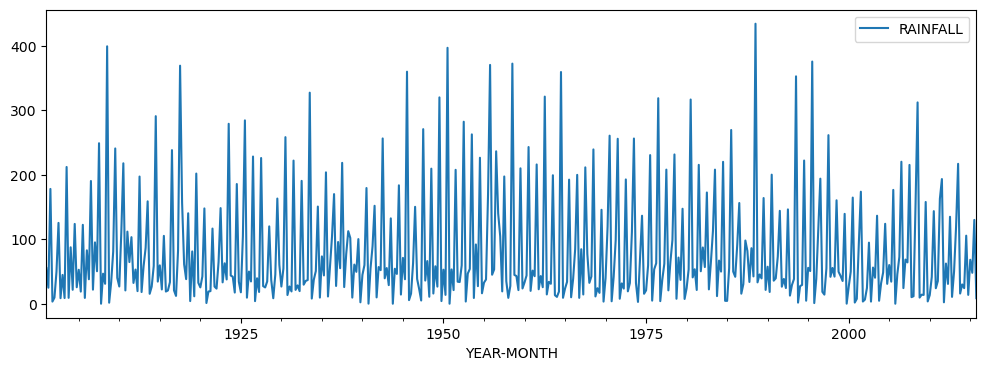

In [546]:
rainfall_data_max_q.plot(figsize=(12,4))

In [547]:
rainfall_data.resample(rule='A').mean()
rainfall_data.head(5)

,RAINFALL
YEAR-MONTH,
1901-01-01,55.7
1901-02-01,50.1
1901-03-01,25.2
1901-04-01,2.1
1901-05-01,25.2


<Axes: xlabel='YEAR-MONTH'>

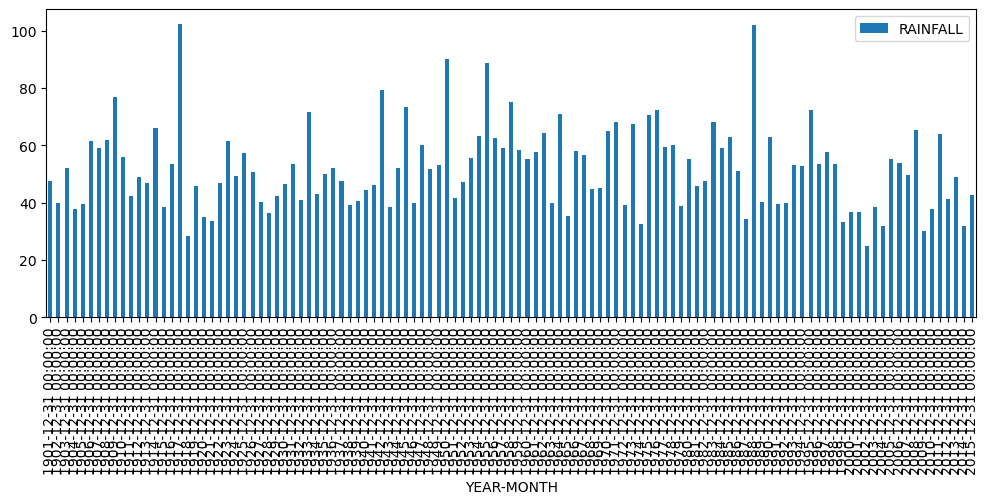

In [548]:
rainfall_data.resample(rule='A').mean().plot(kind='bar',figsize=(12,4))

In [549]:
rainfall_data_r = pd.DataFrame(rainfall_data)
rainfall_data_r['1YR R'] = rainfall_data_r['RAINFALL'].rolling(window=12,min_periods=1).mean()

In [550]:
rainfall_data_r.head()

,RAINFALL,1YR R
YEAR-MONTH,,
1901-01-01,55.7,55.700000
1901-02-01,50.1,52.900000
1901-03-01,25.2,43.666667
1901-04-01,2.1,33.275000
1901-05-01,25.2,31.660000


<Axes: xlabel='YEAR-MONTH'>

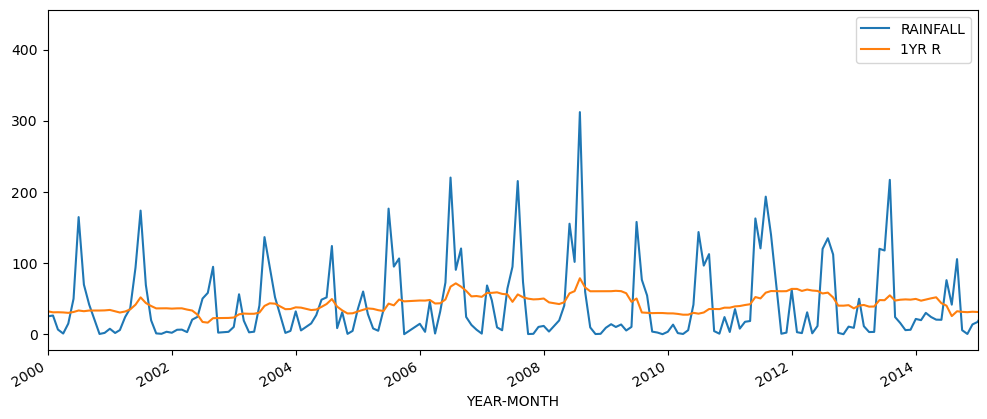

In [551]:
rainfall_data_r[['RAINFALL','1YR R']].plot(xlim=['2000-01-01','2015-01-01'],figsize=(12,5))

In [552]:
rainfall_data_cr = pd.DataFrame(rainfall_data)
rainfall_data_cr['1YR R'] = rainfall_data_cr['RAINFALL'].expanding().mean()

<Axes: xlabel='YEAR-MONTH'>

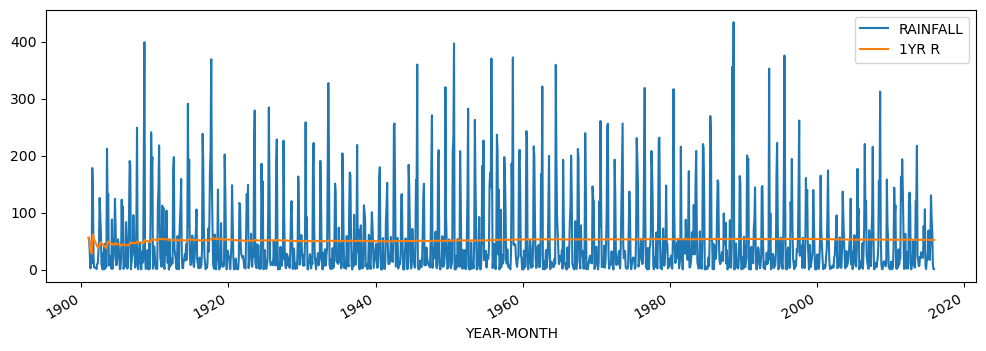

In [553]:
rainfall_data_cr.plot(figsize=(12,4))

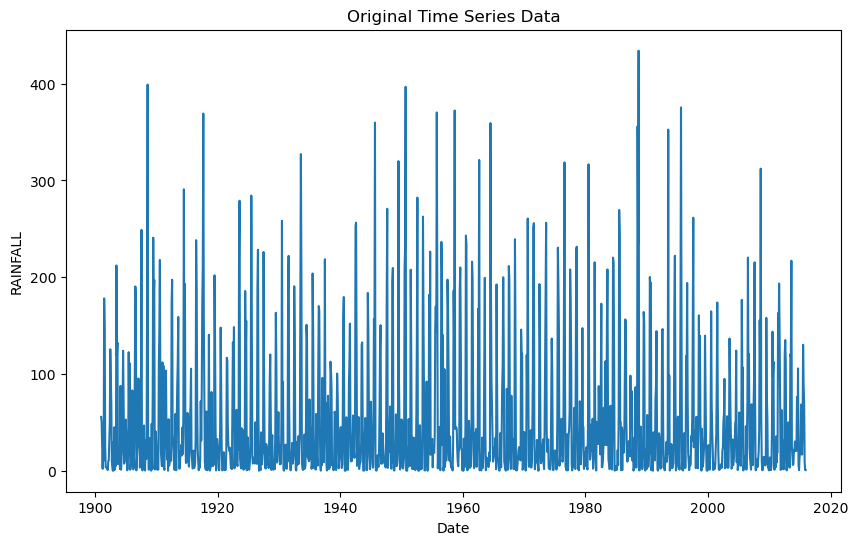

In [556]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

rainfall_data = pd.DataFrame(rainfall_data)
plt.figure(figsize=(10, 6))
plt.plot(rainfall_data['RAINFALL'])
plt.title('Original Time Series Data')
plt.xlabel('Date')
plt.ylabel('RAINFALL')
plt.show()

In [564]:
start_date = '2000-01-01'
end_date = '2015-12-31'
df = df.loc[(df['YEAR-MONTH'] >= start_date) & (df['YEAR-MONTH'] <= end_date)]
df.head()

,YEAR-MONTH,RAINFALL,year
1129,2000-01-01,25.4,2000
1130,2000-02-01,26.6,2000
1131,2000-03-01,6.9,2000
1132,2000-04-01,1.3,2000
1133,2000-05-01,15.3,2000


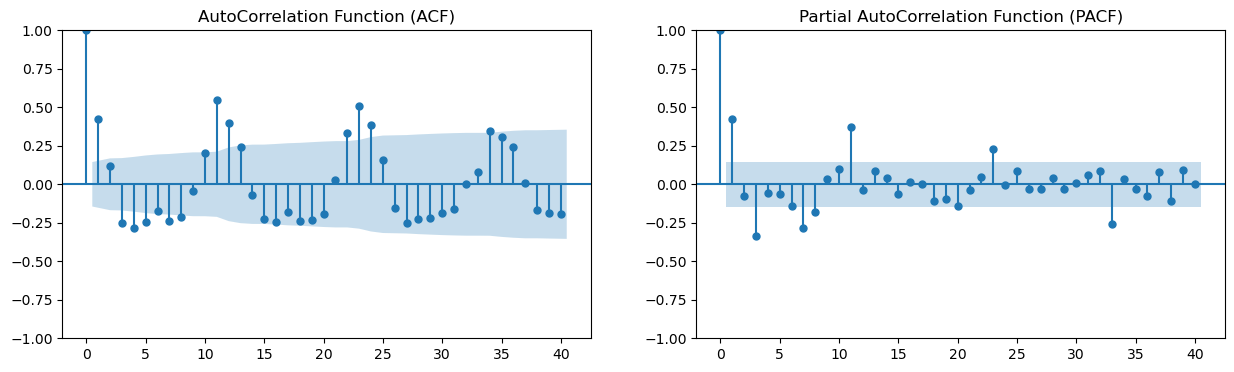

In [565]:
# Plot ACF and PACF
fig, ax = plt.subplots(1, 2, figsize=(15, 4))

# Plot ACF
plot_acf(df['RAINFALL'], lags=40, ax=ax[0])
ax[0].set_title('AutoCorrelation Function (ACF)')

# Plot PACF
plot_pacf(df['RAINFALL'], lags=40, ax=ax[1])
ax[1].set_title('Partial AutoCorrelation Function (PACF)')

plt.show()

In [516]:
# from itertools import product
# import warnings
# from statsmodels.tsa.statespace.sarimax import SARIMAX
# from sklearn.metrics import mean_squared_error

# # Define the p, d, q, and s parameters to take any value between 0 and 2
# p = d = q = range(0, 3)
# s = [12]  # Seasonal cycle length

# # Generate all different combinations of p, d, q, and s triplets
# pdq = list(product(p, d, q))
# seasonal_pdq = [(x[0], x[1], x[2], x[3]) for x in list(product(p, d, q, s))]

# # Initialize variables to store best params
# best_aic = float('inf')
# best_pdq = None
# best_seasonal_pdq = None

# warnings.filterwarnings('ignore')  # Ignore warning messages

# # Grid search
# for param in pdq:
#     for param_seasonal in seasonal_pdq:
#         try:
#             model = SARIMAX(train['RAINFALL'], order=param, seasonal_order=param_seasonal)
#             results = model.fit(disp=False)
#             if results.aic < best_aic:
#                 best_aic = results.aic
#                 best_pdq = param
#                 best_seasonal_pdq = param_seasonal
#         except:
#             continue

# best_aic, best_pdq, best_seasonal_pdq

In [566]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
train, test = df[0:train_size], df[train_size:len(df)]

# Fit the SARIMAX model to the training data
# For demonstration, we'll use p=1, d=1, q=1, and s=12 (seasonal order)
model = SARIMAX(train['RAINFALL'], order=(6, 0, 10), seasonal_order=(1, 1, 1, 12))
# model=SARIMAX(train['RAINFALL'],order=(1,0,0),seasonal_order=(0,1,1,12)).fit()
results = model.fit(disp=False)



# Make predictions on the testing data
predictions = results.get_forecast(steps=len(test)).predicted_mean

# Calculate metrics
mae = mean_absolute_error(test['RAINFALL'], predictions)
mse = mean_squared_error(test['RAINFALL'], predictions)
rmse = np.sqrt(mse)

mae, mse, rmse

(35.83585338808255, 1994.4040169050736, 44.658750731576376)

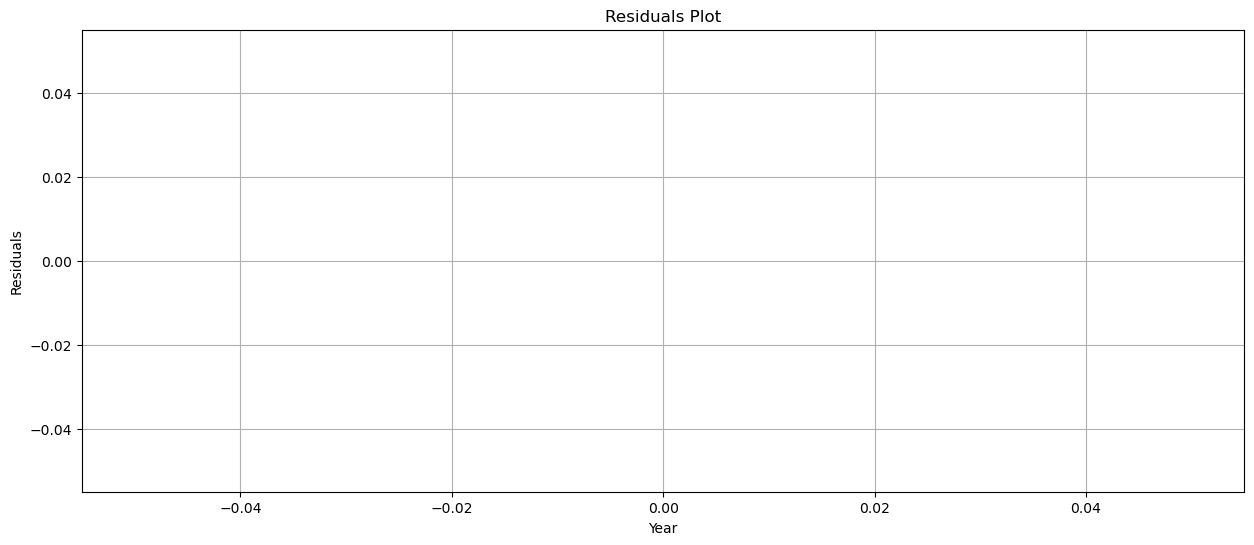

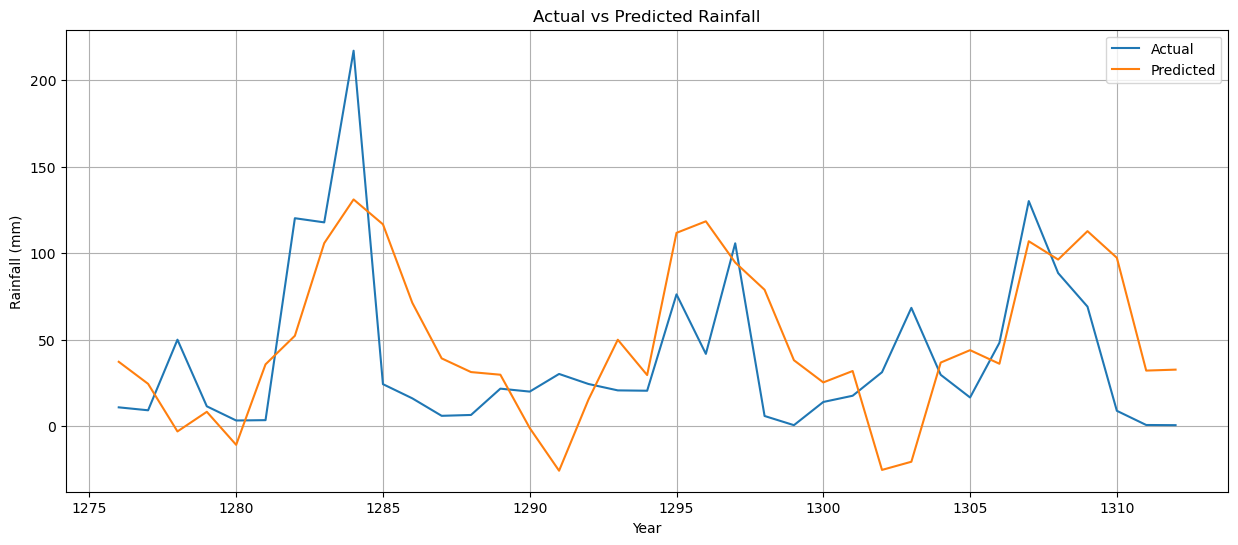

In [567]:
# Plot residuals
residuals = test['RAINFALL'] - predictions
plt.figure(figsize=(15, 6))
plt.plot(residuals.index, residuals)
plt.title('Residuals Plot')
plt.xlabel('Year')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# Plot actual vs predicted values
plt.figure(figsize=(15, 6))
plt.plot(test.index, test['RAINFALL'], label='Actual')
plt.plot(test.index, predictions, label='Predicted')
plt.title('Actual vs Predicted Rainfall')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.legend()
plt.grid(True)
plt.show()

In [568]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
df.head(5)

Num GPUs Available:  0


,YEAR-MONTH,RAINFALL,year
1129,2000-01-01,25.4,2000
1130,2000-02-01,26.6,2000
1131,2000-03-01,6.9,2000
1132,2000-04-01,1.3,2000
1133,2000-05-01,15.3,2000


In [569]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import numpy as np

# Normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(df[['RAINFALL']])

# Convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# Create the dataset with a look_back
look_back = 1
trainX, trainY = create_dataset(dataset[0:train_size], look_back)
testX, testY = create_dataset(dataset[train_size:len(dataset)], look_back)

# Reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# Create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

# Make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# Calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))

trainScore, testScore

Epoch 1/100
145/145 - 4s - loss: 0.0474 - 4s/epoch - 27ms/step
Epoch 2/100
145/145 - 0s - loss: 0.0365 - 153ms/epoch - 1ms/step
Epoch 3/100
145/145 - 0s - loss: 0.0348 - 152ms/epoch - 1ms/step
Epoch 4/100
145/145 - 0s - loss: 0.0335 - 155ms/epoch - 1ms/step
Epoch 5/100
145/145 - 0s - loss: 0.0327 - 159ms/epoch - 1ms/step
Epoch 6/100
145/145 - 0s - loss: 0.0321 - 160ms/epoch - 1ms/step
Epoch 7/100
145/145 - 0s - loss: 0.0314 - 149ms/epoch - 1ms/step
Epoch 8/100
145/145 - 0s - loss: 0.0308 - 150ms/epoch - 1ms/step
Epoch 9/100
145/145 - 0s - loss: 0.0302 - 149ms/epoch - 1ms/step
Epoch 10/100
145/145 - 0s - loss: 0.0294 - 149ms/epoch - 1ms/step
Epoch 11/100
145/145 - 0s - loss: 0.0288 - 150ms/epoch - 1ms/step
Epoch 12/100
145/145 - 0s - loss: 0.0283 - 150ms/epoch - 1ms/step
Epoch 13/100
145/145 - 0s - loss: 0.0279 - 154ms/epoch - 1ms/step
Epoch 14/100
145/145 - 0s - loss: 0.0277 - 169ms/epoch - 1ms/step
Epoch 15/100
145/145 - 0s - loss: 0.0275 - 152ms/epoch - 1ms/step
Epoch 16/100
145/145 

(49.72839505141235, 43.28063084767787)

In [521]:
# from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
# from sklearn.model_selection import GridSearchCV

# # Function to create the LSTM model required for KerasRegressor
# def create_lstm_model(optimizer='adam', units=50, activation='tanh', dropout_rate=0.0):
#     model = Sequential()
#     model.add(LSTM(units=units, activation=activation, dropout=dropout_rate, input_shape=(1, look_back)))
#     model.add(Dense(1))
#     model.compile(optimizer=optimizer, loss='mean_squared_error')
#     return model

# # Create the KerasRegressor model
# model = KerasRegressor(build_fn=create_lstm_model, epochs=100, batch_size=1, verbose=0)

# # Define the grid search parameters
# param_grid = {
#     'epochs': [50, 100],
#     'batch_size': [1, 10],
#     'optimizer': ['SGD', 'Adam'],
#     'units': [30, 50],
#     'activation': ['relu', 'tanh'],
#     'dropout_rate': [0.0, 0.2]
# }

# # Create Grid Search
# grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
# grid_result = grid.fit(trainX, trainY)

# # Summarize results
# best_params = grid_result.best_params_
# best_score = grid_result.best_score_
# best_params, best_score

ValueError: Found input variables with inconsistent numbers of samples: [1048, 1]

In [ ]:
# Option 1: Remove the first element from the larger array
plt.plot(df.index[train_size+2:], testY[0], label='Actual')
plt.plot(df.index[train_size+2:], testPredict[:, 0], label='Predicted')

# Option 2: Add a placeholder to the smaller array (if needed)
# testPredict = np.insert(testPredict, 0, np.nan, axis=0)
# plt.plot(df.index[train_size+1:], testY[0], label='Actual')
# plt.plot(df.index[train_size+1:], testPredict[:, 0], label='Predicted')

plt.title('LSTM Model: Actual vs Predicted Rainfall')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:

# Perform Augmented Dickey-Fuller test
result = adfuller(df['RAINFALL'])
print("ADF Test Results:")
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

# Check p-value against significance level (e.g., 0.05)
if result[1] <= 0.05:
    print("Reject the null hypothesis. Data is stationary.")
else:
    print("Fail to reject the null hypothesis. Data is non-stationary.")

In [ ]:
# Plot Autocorrelation Function (ACF)
plt.figure(figsize=(20, 15))
plot_acf(rainfall_data, lags=100)
plt.xlabel('Lags')
plt.ylabel('ACF')
plt.title('Autocorrelation Function (ACF)')
plt.show()

# Plot Partial Autocorrelation Function (PACF)
plt.figure(figsize=(20, 15))
plot_pacf(rainfall_data, lags=100)
plt.xlabel('Lags')
plt.ylabel('PACF')
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

In [ ]:
from datetime import datetime,timedelta
train_dataset_end=datetime(2000,12,1)
test_dataset_end=datetime(2010,12,1)

In [ ]:
train_data=rainfall_data[:train_dataset_end]
test_data=rainfall_data[train_dataset_end+timedelta(days=1):test_dataset_end]

In [ ]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [ ]:
test_data

In [ ]:
## create a ARIMA model
from statsmodels.tsa.arima_model import ARIMA

# p=1,3,4,5,6,7,10,11,12  seasonal for sarimax = 6  ,q =10/54

model_ARIMA=ARIMA(rainfall_data['RAINFALL'],order=(1,0,10))
model_Arima_fit=model_ARIMA.fit()
model_Arima_fit.summary()

In [ ]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

In [ ]:
pred=model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=rainfall_data['RAINFALL']-pred

In [ ]:
pred

In [ ]:
residuals

In [ ]:
model_Arima_fit.resid.plot(kind='kde')

In [ ]:
test_data['Predicted_ARIMA']=pred

In [ ]:
test_data[['RAINFALL','Predicted_ARIMA']].plot()